In [1]:
# generaly imports
import os
import numpy as np
import pandas as pd
from tifffile import imread
import matplotlib.pyplot as plt

In [2]:
# pytorch imports
import torch 
from torch import optim
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [3]:
# custom imports
from utils.data import ImageMaskData, FlipHorizontal, FlipVertical, Normalize, ToTensor, get_datapoints
from utils.train_denoise import train
from utils.tools import get_true_index, display_predicted_mask

In [4]:
# set data type and device
dtype = torch.float
ltype = torch.long

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda:0


In [5]:
# create crop dataframe
crop_file = pd.read_csv('slice_information_201020.csv')[['Scan ID', 'Bone', 'Notch Full']]
crop_file.index = crop_file['Scan ID']
crop_file = crop_file.drop('Scan ID', axis=1)
crop_file = crop_file.dropna()

### Get Dataframe Of File Paths & Create Datasets

In [6]:
# list of tuples containig (input, target) folders
bone_crack = [
    ('../Sample3_657_NoLoading', 
    '../Sample3_3937_NoLoading'),
    ('../Sample2_657_NoLoading', 
    '../Sample2_3937_NoLoading'),
    ('../Sample2_657_NoLoading', 
    '../Sample2_3937_NoLoading'),
    ('../Sample2_657_NoLoading', 
    '../Sample2_3937_NoLoading'),
    ('../Sample2_657_NoLoading', 
    '../Sample2_3937_NoLoading'),
]

In [7]:
# set number of images to be read in as a sample
slab = 5

# get datapoints
d_train, d_val = get_datapoints(bone_crack, slab, split=0.15, crop_file=crop_file)

# create datasets
data_train = ImageMaskData(d_train, transform=transforms.Compose([FlipHorizontal(), FlipVertical(), ToTensor()]))
data_val = ImageMaskData(d_val, transform=transforms.Compose([ToTensor()]))

# review dataset metrics
print(f'Training Data:   {len(data_train)} images')
print(f'Validation Data: {len(data_val)} images')

Training Data:   2630 images
Validation Data: 523 images


In [9]:
disp_x, disp_y = data_val[80]

disp_x = disp_x.unsqueeze(dim=0)
disp_y = disp_y.unsqueeze(dim=0)

display_input=(disp_x, disp_y)

### Define Data Loaders

In [10]:
batch_size=2
loader_train = DataLoader(data_train, batch_size=batch_size, shuffle=True)
loader_val = DataLoader(data_val, batch_size=batch_size, shuffle=False)

### Instantiate Model & Define Hyperparameters

In [11]:
from model.u_model import UModel_Denoise

# set random seed for reproducibility
torch.manual_seed(123)

# instantiate model
model = UModel_Denoise(channels=(slab, 32, 64, 128, 256, 512))

# set hyperparameters
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model = model.to(device=device)

### Train Model

Directory "results_210727_1659" Created


Starting Epoch: 1
Epoch: 1, Batch: 0200, Batch loss: 17.180267, Time: 0.02 hr
Epoch: 1, Batch: 0400, Batch loss: 18.844442, Time: 0.04 hr
Epoch: 1, Batch: 0600, Batch loss: 17.495218, Time: 0.07 hr
Epoch: 1, Batch: 0800, Batch loss: 14.040988, Time: 0.09 hr
Epoch: 1, Batch: 1000, Batch loss: 22.075897, Time: 0.11 hr
Epoch: 1, Batch: 1200, Batch loss: 16.101084, Time: 0.13 hr
Epoch: 1, Training loss: 14.907264, Val loss: 14.856346, Time: 0.26 hr


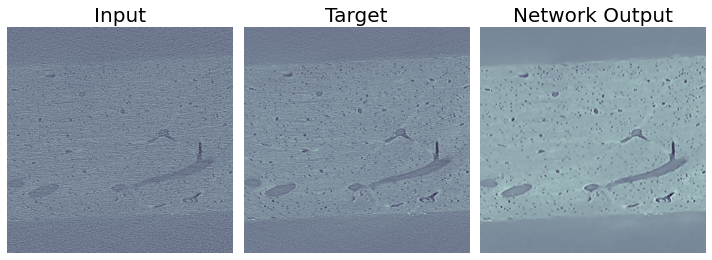


Starting Epoch: 2
Epoch: 2, Batch: 0200, Batch loss: 14.77249, Time: 0.28 hr
Epoch: 2, Batch: 0400, Batch loss: 9.169434, Time: 0.3 hr
Epoch: 2, Batch: 0600, Batch loss: 16.704906, Time: 0.32 hr
Epoch: 2, Batch: 0800, Batch loss: 9.775213, Time: 0.35 hr
Epoch: 2, Batch: 1000, Batch loss: 14.724756, Time: 0.37 hr
Epoch: 2, Batch: 1200, Batch loss: 10.361603, Time: 0.39 hr
Epoch: 2, Training loss: 11.991107, Val loss: 12.001249, Time: 0.51 hr


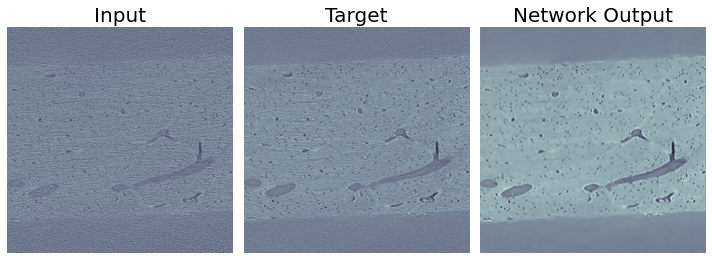


Starting Epoch: 3
Epoch: 3, Batch: 0200, Batch loss: 11.522723, Time: 0.54 hr
Epoch: 3, Batch: 0400, Batch loss: 12.508632, Time: 0.56 hr
Epoch: 3, Batch: 0600, Batch loss: 12.446867, Time: 0.58 hr
Epoch: 3, Batch: 0800, Batch loss: 17.602524, Time: 0.6 hr
Epoch: 3, Batch: 1000, Batch loss: 21.604858, Time: 0.63 hr
Epoch: 3, Batch: 1200, Batch loss: 14.076948, Time: 0.65 hr
Epoch: 3, Training loss: 11.755725, Val loss: 11.762131, Time: 0.77 hr


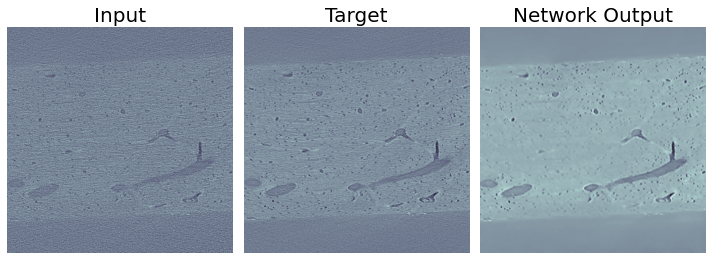


Starting Epoch: 4
Epoch: 4, Batch: 0200, Batch loss: 8.601542, Time: 0.79 hr
Epoch: 4, Batch: 0400, Batch loss: 12.343146, Time: 0.82 hr
Epoch: 4, Batch: 0600, Batch loss: 9.542175, Time: 0.84 hr
Epoch: 4, Batch: 0800, Batch loss: 14.397749, Time: 0.86 hr
Epoch: 4, Batch: 1000, Batch loss: 13.490741, Time: 0.88 hr
Epoch: 4, Batch: 1200, Batch loss: 14.292553, Time: 0.91 hr
Epoch: 4, Training loss: 11.752739, Val loss: 11.769281, Time: 1.03 hr

Starting Epoch: 5
Epoch: 5, Batch: 0200, Batch loss: 13.944812, Time: 1.05 hr
Epoch: 5, Batch: 0400, Batch loss: 12.948093, Time: 1.07 hr
Epoch: 5, Batch: 0600, Batch loss: 10.054774, Time: 1.1 hr
Epoch: 5, Batch: 0800, Batch loss: 9.028822, Time: 1.12 hr
Epoch: 5, Batch: 1000, Batch loss: 13.046074, Time: 1.14 hr
Epoch: 5, Batch: 1200, Batch loss: 12.835425, Time: 1.16 hr
Epoch: 5, Training loss: 11.790516, Val loss: 11.767212, Time: 1.29 hr

Starting Epoch: 6
Epoch: 6, Batch: 0200, Batch loss: 15.662392, Time: 1.31 hr
Epoch: 6, Batch: 0400, Ba

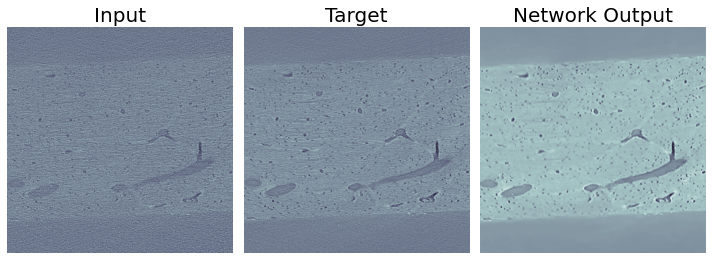


Starting Epoch: 7
Epoch: 7, Batch: 0200, Batch loss: 13.576855, Time: 1.56 hr
Epoch: 7, Batch: 0400, Batch loss: 8.621368, Time: 1.59 hr
Epoch: 7, Batch: 0600, Batch loss: 12.663866, Time: 1.61 hr
Epoch: 7, Batch: 0800, Batch loss: 8.339815, Time: 1.63 hr
Epoch: 7, Batch: 1000, Batch loss: 9.304512, Time: 1.65 hr
Epoch: 7, Batch: 1200, Batch loss: 11.157899, Time: 1.68 hr
Epoch: 7, Training loss: 11.844948, Val loss: 11.825583, Time: 1.8 hr

Starting Epoch: 8
Epoch: 8, Batch: 0200, Batch loss: 7.656834, Time: 1.82 hr
Epoch: 8, Batch: 0400, Batch loss: 11.673761, Time: 1.84 hr
Epoch: 8, Batch: 0600, Batch loss: 9.127693, Time: 1.87 hr
Epoch: 8, Batch: 0800, Batch loss: 12.979122, Time: 1.89 hr
Epoch: 8, Batch: 1000, Batch loss: 10.665493, Time: 1.91 hr
Epoch: 8, Batch: 1200, Batch loss: 9.482613, Time: 1.93 hr
Epoch: 8, Training loss: 11.575153, Val loss: 11.58882, Time: 2.06 hr


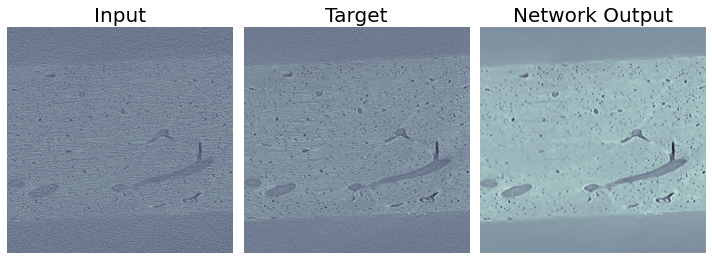


Starting Epoch: 9
Epoch: 9, Batch: 0200, Batch loss: 10.99527, Time: 2.08 hr
Epoch: 9, Batch: 0400, Batch loss: 17.589926, Time: 2.1 hr
Epoch: 9, Batch: 0600, Batch loss: 12.97164, Time: 2.12 hr
Epoch: 9, Batch: 0800, Batch loss: 17.442945, Time: 2.15 hr
Epoch: 9, Batch: 1000, Batch loss: 8.817282, Time: 2.17 hr
Epoch: 9, Batch: 1200, Batch loss: 8.199743, Time: 2.19 hr
Epoch: 9, Training loss: 11.613111, Val loss: 11.633038, Time: 2.31 hr

Starting Epoch: 10
Epoch: 10, Batch: 0200, Batch loss: 8.934216, Time: 2.33 hr
Epoch: 10, Batch: 0400, Batch loss: 10.486615, Time: 2.36 hr
Epoch: 10, Batch: 0600, Batch loss: 18.583393, Time: 2.38 hr
Epoch: 10, Batch: 0800, Batch loss: 9.71459, Time: 2.4 hr
Epoch: 10, Batch: 1000, Batch loss: 9.575656, Time: 2.42 hr
Epoch: 10, Batch: 1200, Batch loss: 15.863233, Time: 2.45 hr
Epoch: 10, Training loss: 11.758471, Val loss: 11.723521, Time: 2.57 hr


In [12]:
# set number of epochs
training_epochs=10

# train model
loss_train, loss_val = train(model, 
                             optimizer, 
                             loader_train, 
                             loader_val, 
                             epochs=training_epochs, 
                             print_every=200, 
                             device=device, 
                             dtype=dtype, 
                             save_results=True,
                             display_input=display_input)

### Review Loss

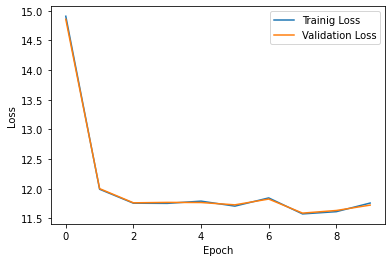

In [13]:
plt.plot(loss_train, label='Trainig Loss')
plt.plot(loss_val, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

pd.DataFrame({'Training Loss': loss_train, 'Validation Loss': loss_val}).to_csv('results_210727_1659/loss.csv', index=False)

### Apply Network

In [7]:
checkpoint = torch.load('model/params_denoise.tar')
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device=device)

In [8]:
from utils.data import ImageDataApply, get_datapoints_apply, ToTensorApply
from utils.tools import apply_network_loader

In [9]:
dp_apply = get_datapoints_apply(['../Sample3_657_NoLoading'], slab=slab, crop_file=crop_file)
data_apply = ImageDataApply(dp_apply, transform=transforms.Compose([ToTensorApply()]))
loader_apply = DataLoader(data_apply)

In [11]:
fldr_output = 'Sample3_unet'
apply_network_loader(model, loader_apply, fldr_output, device=device, dtype=dtype, segmentation=False)

Beginning Predictions
[100/612]
[200/612]
[300/612]
[400/612]
[500/612]
[600/612]
Complete!

